In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import anndata
import umap.umap_ as umap
import leidenalg
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import pairwise_distances
from scipy.stats import zscore
from matplotlib.colorbar import ColorbarBase
import matplotlib.colors as mcolors

%matplotlib inline

In [17]:
plt.style.use('dark_background')

# Xenium Analysis

In [2]:
xenium_scdata = sc.read_h5ad(r"D:\SMI-0214_DonCleveland_UCSD\SMI-0214_DonCleveland_UCSD\Xenium_mouse_filtered.h5ad")
xenium_scdata

AnnData object with n_obs × n_vars = 547139 × 248
    obs: 'cell_id', 'Sample ID', 'Number of genes', 'Number of transcripts', 'leiden', 'cluster_names'
    uns: 'Sample ID_colors', 'cell_id_colors', 'cluster_names_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_spatial', 'X_spatial_rescaled', 'X_spatial_rescaled_flipped', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [6]:
xenium_transcripts = xenium_scdata.obs['Number of transcripts']
xenium_transcripts

1          12
2          34
4           6
5          16
6          30
         ... 
556312    159
556313     97
556314     86
556315      5
556322      5
Name: Number of transcripts, Length: 547139, dtype: int64

In [8]:
print(f'Xenium mean transcript count: {xenium_transcripts.mean()}')
print(f'Xenium standard deviation transcript count: {xenium_transcripts.std()}')

Xenium mean transcript count: 210.90116771058177
Xenium standard deviation transcript count: 137.1827185104737


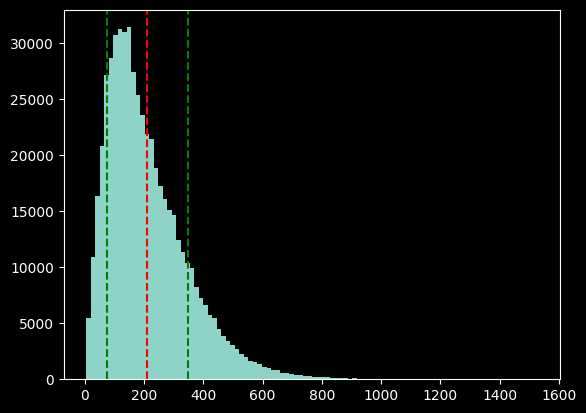

In [18]:
plt.hist(xenium_transcripts, bins = 100)
plt.axvline(xenium_transcripts.mean(), color = 'red', linestyle = 'dashed', label = 'Mean')
plt.axvline(xenium_transcripts.mean() - xenium_transcripts.std(), color = 'green', linestyle = 'dashed', label = '-1 SD')
plt.axvline(xenium_transcripts.mean() + xenium_transcripts.std(), color = 'green', linestyle = 'dashed', label = '+1 SD')

# Cosmx analysis

In [ ]:
cosmx_scdata = 

# Vizgen analysis

In [19]:
vizgen_scdata = sc.read_h5ad(r"D:\SMI-0214_DonCleveland_UCSD\SMI-0214_DonCleveland_UCSD\Vizgen Analysis\Vizgen_scdata.h5ad")
vizgen_scdata

C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 344687 × 550
    obs: 'cell_id', 'sample_id', 'transcript_count', 'leiden', 'cluster_names'
    uns: 'cluster_names_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_spatial', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [20]:
vizgen_scdata.X

array([[-0.23494753, -0.07364277, -0.14906393, ..., -0.12849408,
        -0.33252725, -0.13853998],
       [-0.23494753, -0.07364277, -0.14906393, ..., -0.12849408,
        -0.33252725, -0.13853998],
       [-0.23494753, -0.07364277, -0.14906393, ..., -0.12849408,
        -0.33252725, -0.13853998],
       ...,
       [-0.18152997, -0.0847249 , -0.1947418 , ..., -0.13837187,
        -0.38658655, -0.17766707],
       [-0.18152997, -0.0847249 , -0.1947418 , ..., -0.13837187,
        -0.38658655, -0.17766707],
       [-0.18152997, -0.0847249 , -0.1947418 , ..., -0.13837187,
        -0.38658655, -0.17766707]], dtype=float32)